In [84]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')
df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [86]:
df.shape

(195, 39)

In [4]:
df.set_index('Country',inplace=True)

In [6]:
df_dns=df.loc[['Denmark','Norway','Sweden'],:]
df_dns

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


In [8]:
total_values=df_dns['Total'].sum()
total_values

np.int64(12094)

In [10]:
category_proportions=df_dns['Total']/total_values
category_proportions

Country
Denmark    0.322557
Norway     0.192409
Sweden     0.485034
Name: Total, dtype: float64

In [11]:
pd.DataFrame({'Category Proportions':category_proportions})

,Category Proportions
Country,
Denmark,0.322557
Norway,0.192409
Sweden,0.485034


In [12]:
width=40
height=10
total_num_tiles=width*height
print(f'Total number of tiles is {total_num_tiles}.')


Total number of tiles is 400.


In [14]:
tiles_per_category = (category_proportions * total_num_tiles).round().astype(int)
pd.DataFrame({"Number of tiles": tiles_per_category})

,Number of tiles
Country,
Denmark,129
Norway,77
Sweden,194


In [15]:
# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width), dtype = np.uint)

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1       
            
        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index
        
print ('Waffle chart populated!')

Waffle chart populated!


<Figure size 640x480 with 0 Axes>

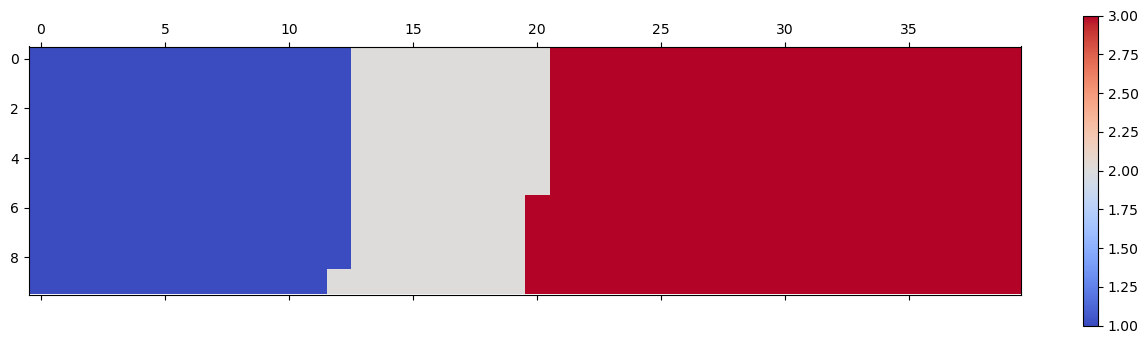

In [16]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()
plt.show()

NameError: name 'df_dsn' is not defined

<Figure size 640x480 with 0 Axes>

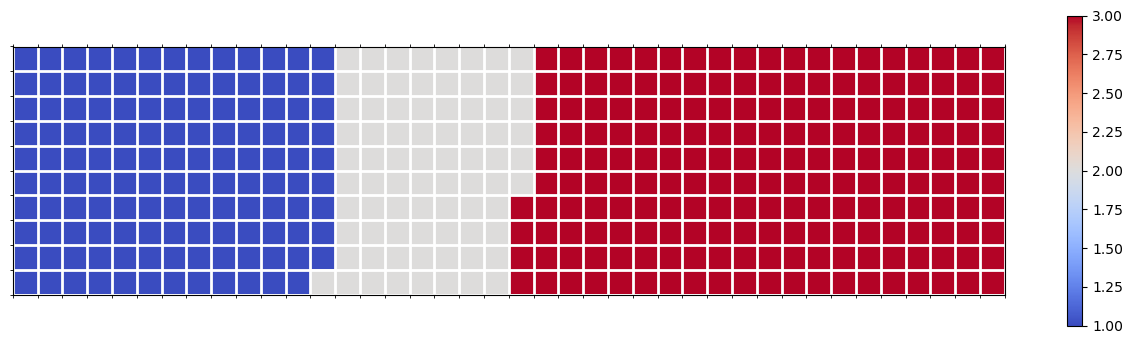

In [17]:
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart

In [5]:
df['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Oceania',
       'Latin America and the Caribbean', 'Northern America'],
      dtype=object)

<Axes: xlabel='Continent', ylabel='count'>

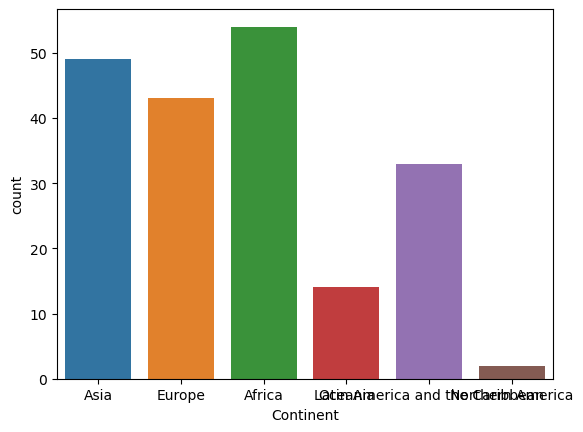

In [6]:
sns.countplot(x='Continent',data=df)

In [11]:
df1=df.replace('Latin America and the Caribbean','L-America')
df1=df1.replace('Northern America','N-America')

In [12]:
df1['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Oceania', 'L-America', 'N-America'],
      dtype=object)

<Axes: xlabel='Continent', ylabel='count'>

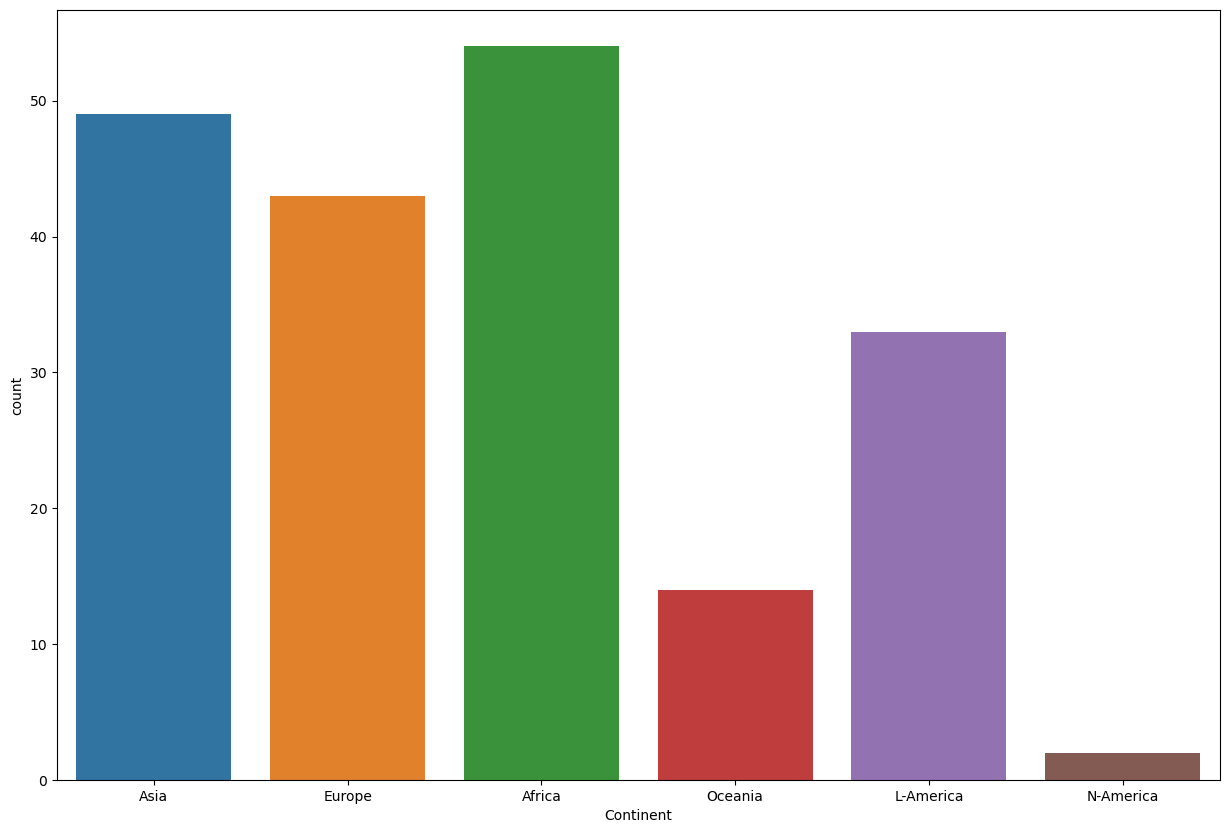

In [13]:
plt.figure(figsize=(15,10))
sns.countplot(x='Continent',data=df1)

<Axes: xlabel='Continent', ylabel='Total'>

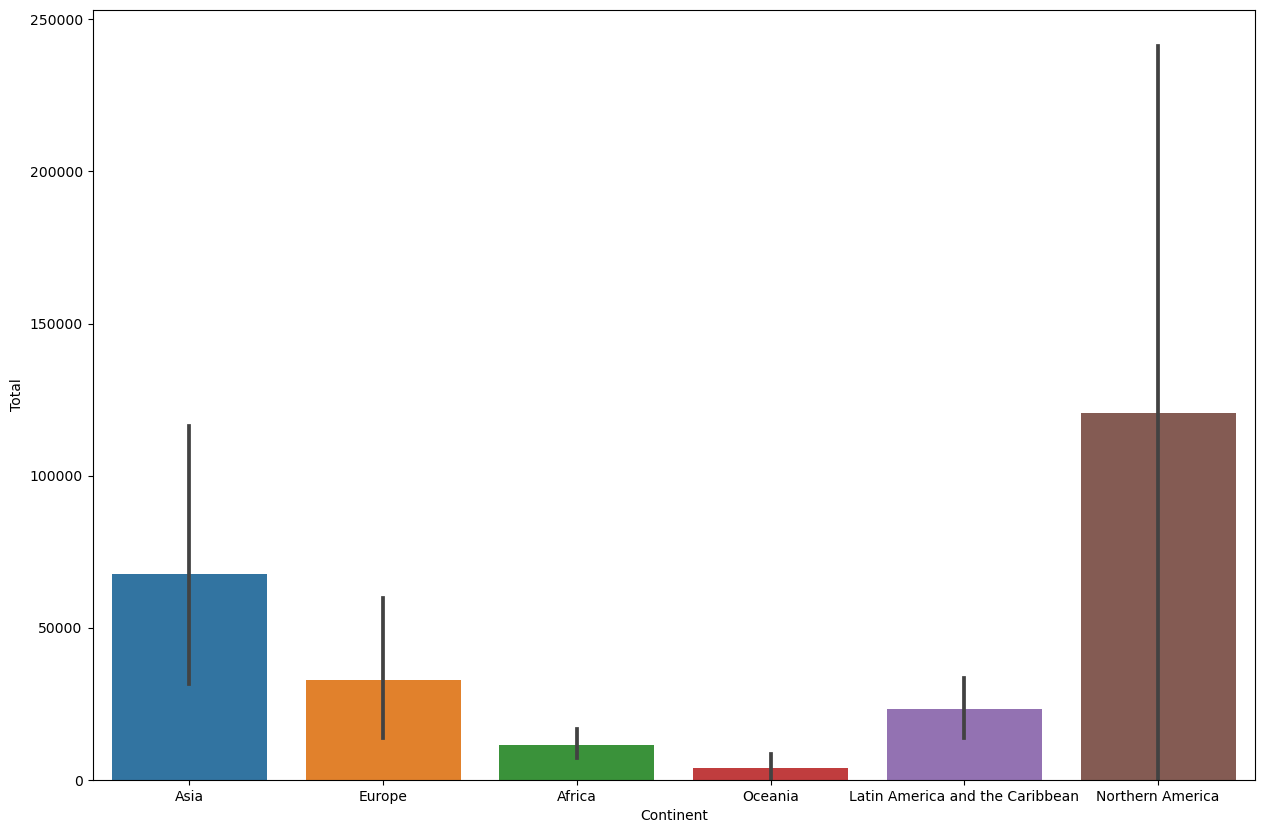

In [14]:
plt.figure(figsize=(15,10))
sns.barplot(x='Continent',y='Total',data=df)

In [17]:
df2=df1.groupby('Continent')['Total'].mean()
df2

Continent
Africa        11462.000000
Asia          67710.081633
Europe        32812.720930
L-America     23186.303030
N-America    120571.000000
Oceania        3941.000000
Name: Total, dtype: float64

In [21]:
years=list(map(str,range(1980,2013)))
df3=df.groupby(years)['Total'].mean()
df3

1980   1981   1982   1983   1984   1985  1986  1987   1988   1989   1990   1991   1992   1993   1994   1995   1996   1997   1998   1999   2000   2001   2002   2003   2004   2005   2006   2007   2008   2009   2010   2011   2012 
0      0      0      0      0      0     0     0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      1      0      0      0      0      0             1.0
                                                                                                                                                                                           2      0      0      0      0      0             2.0
                                                                                                                                                                                    3      50     259    365    271    299    395        1939.0
                                                    

In [23]:
years=list(map(str,range(1980,2014)))
df_tot=pd.DataFrame(df[years].sum(axis=0))
df_tot

,0
1980,99137
1981,110563
1982,104271
1983,75550
1984,73417
1985,69978
1986,86048
1987,134771
1988,139306
1989,164432


In [24]:
df_tot.index=map(float,df_tot.index)
df_tot.reset_index(inplace=True)
df_tot.columns=['year','total']
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


In [25]:
df_tot.shape

(34, 2)

In [27]:
df[years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,16,39,39,47,71,340,496,741,828,1076,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,1,0,0,0,0,0,1,2,2,3,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,80,67,71,69,63,44,69,132,242,434,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,0,1,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
Andorra,0,0,0,0,0,0,2,0,0,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,1191,1829,2162,3404,7583,5907,2741,1406,1411,3004,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Yemen,1,2,1,6,0,18,7,12,7,18,...,124,161,140,122,133,128,211,160,174,217


In [31]:
df[years].sum(axis=1)

Country
Afghanistan       58639
Albania           15699
Algeria           69439
American Samoa        6
Andorra              15
                  ...  
Viet Nam          97146
Western Sahara        2
Yemen              2985
Zambia             1677
Zimbabwe           8598
Length: 195, dtype: int64

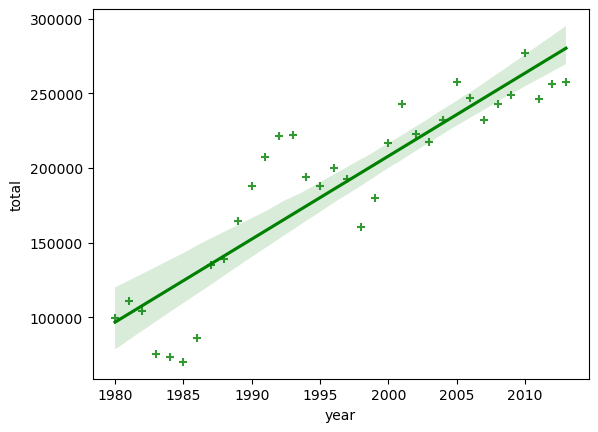

In [34]:
sns.regplot(x='year',y='total',data=df_tot,color='green',marker='+')
plt.show()

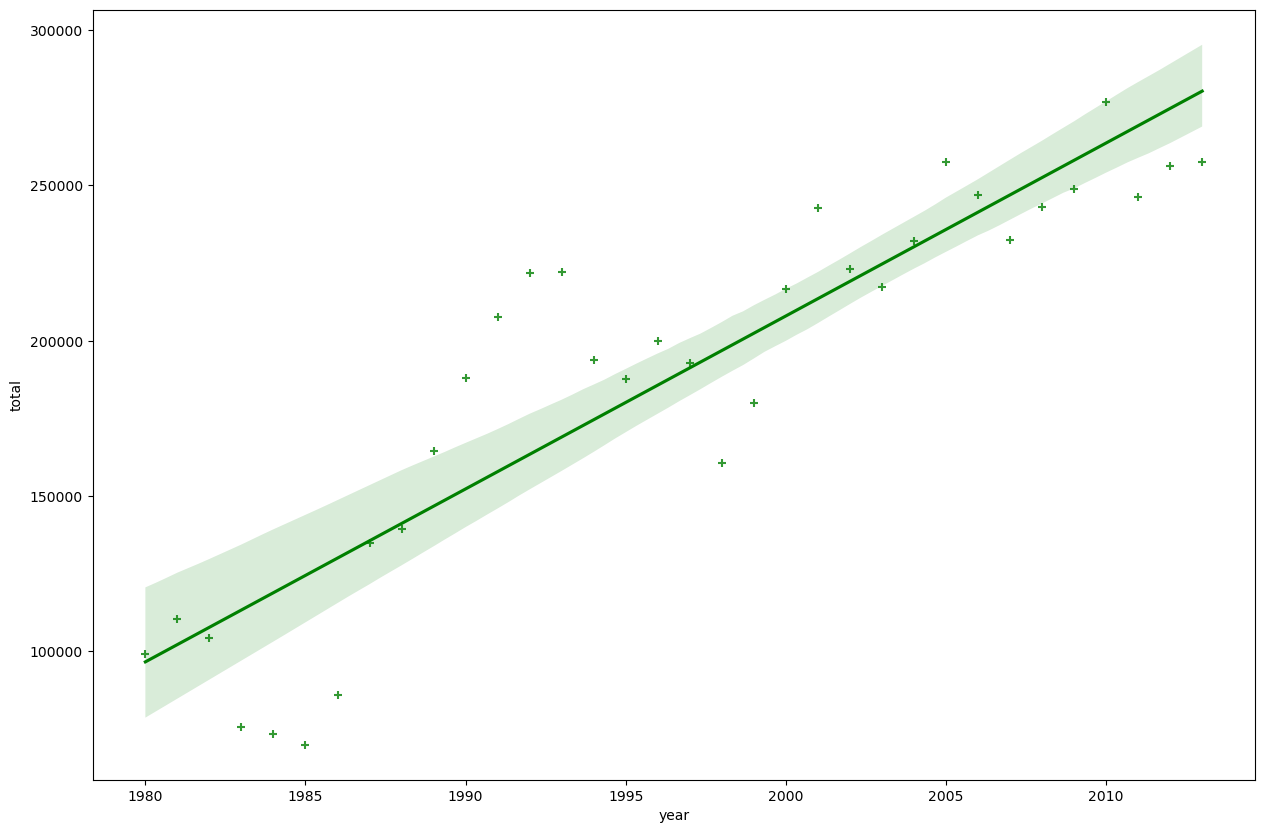

In [35]:
plt.figure(figsize=(15, 10))
sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')
plt.show()

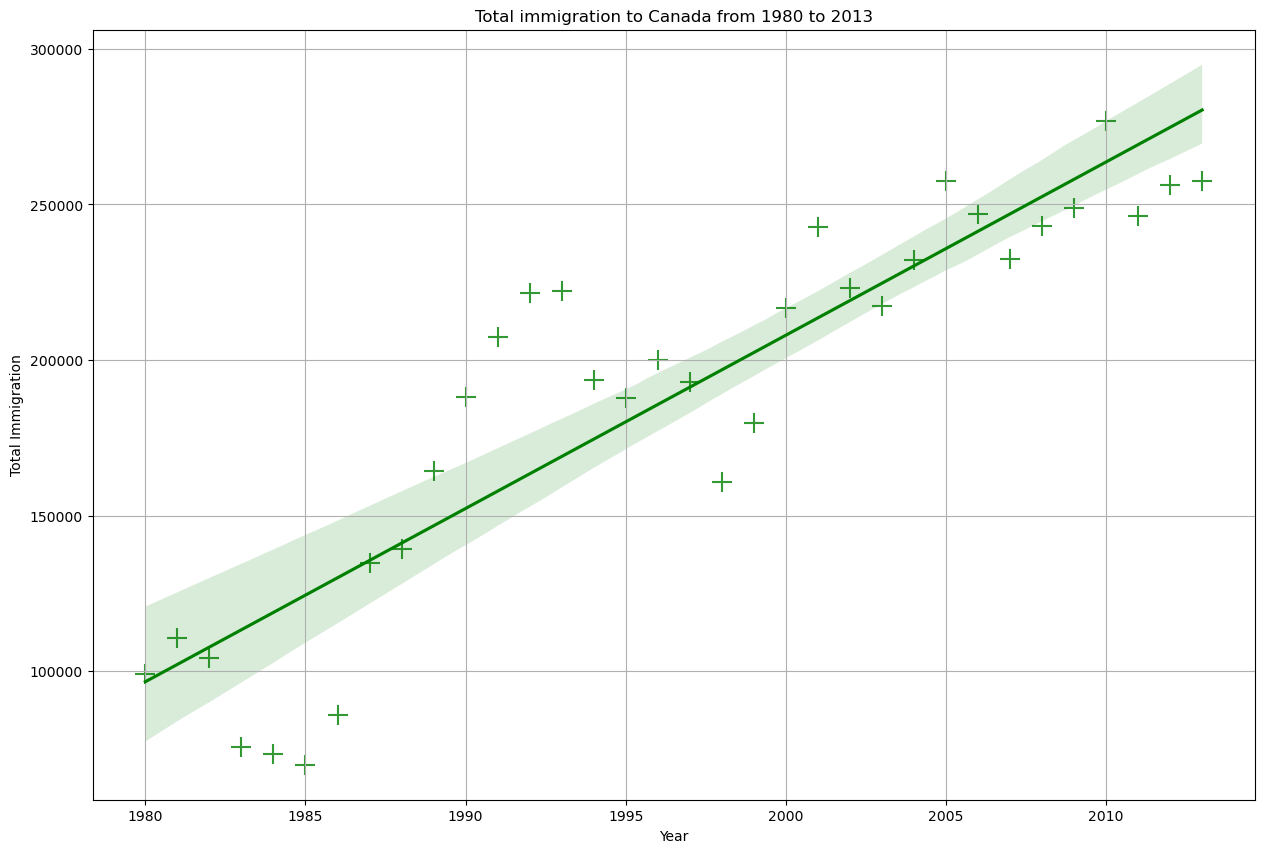

In [37]:
plt.figure(figsize=(15,10))
ax=sns.regplot(x='year',y='total',data=df_tot,color='green',marker='+',scatter_kws={'s':200})
ax.set(xlabel='Year',ylabel='Total Immigration')
ax.set_title('Total immigration to Canada from 1980 to 2013')
ax.grid(True)
plt.show()

In [56]:
df_dns=df.loc[['Denmark','Norway','Sweden'],years]
df_dns

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


In [57]:
df_dns1=df_dns[years].sum(axis=0)
df_dns1

1980    669
1981    678
1982    627
1983    333
1984    252
1985    285
1986    336
1987    387
1988    373
1989    387
1990    331
1991    381
1992    411
1993    481
1994    345
1995    352
1996    301
1997    338
1998    217
1999    287
2000    287
2001    343
2002    293
2003    327
2004    291
2005    324
2006    293
2007    363
2008    339
2009    323
2010    297
2011    276
2012    287
2013    280
dtype: int64

In [58]:
df_dns=df_dns.transpose()

In [59]:
df_dns

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128
1985,73,54,158
1986,93,56,187
1987,109,80,198
1988,129,73,171
1989,129,76,182


In [60]:
df_tot=pd.DataFrame(df_dns.sum(axis=1))
df_tot

,0
1980,669
1981,678
1982,627
1983,333
1984,252
1985,285
1986,336
1987,387
1988,373
1989,387


In [61]:
df_tot.reset_index(inplace=True)
df_tot

,index,0
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252
5,1985,285
6,1986,336
7,1987,387
8,1988,373
9,1989,387


<Axes: xlabel='year', ylabel='total'>

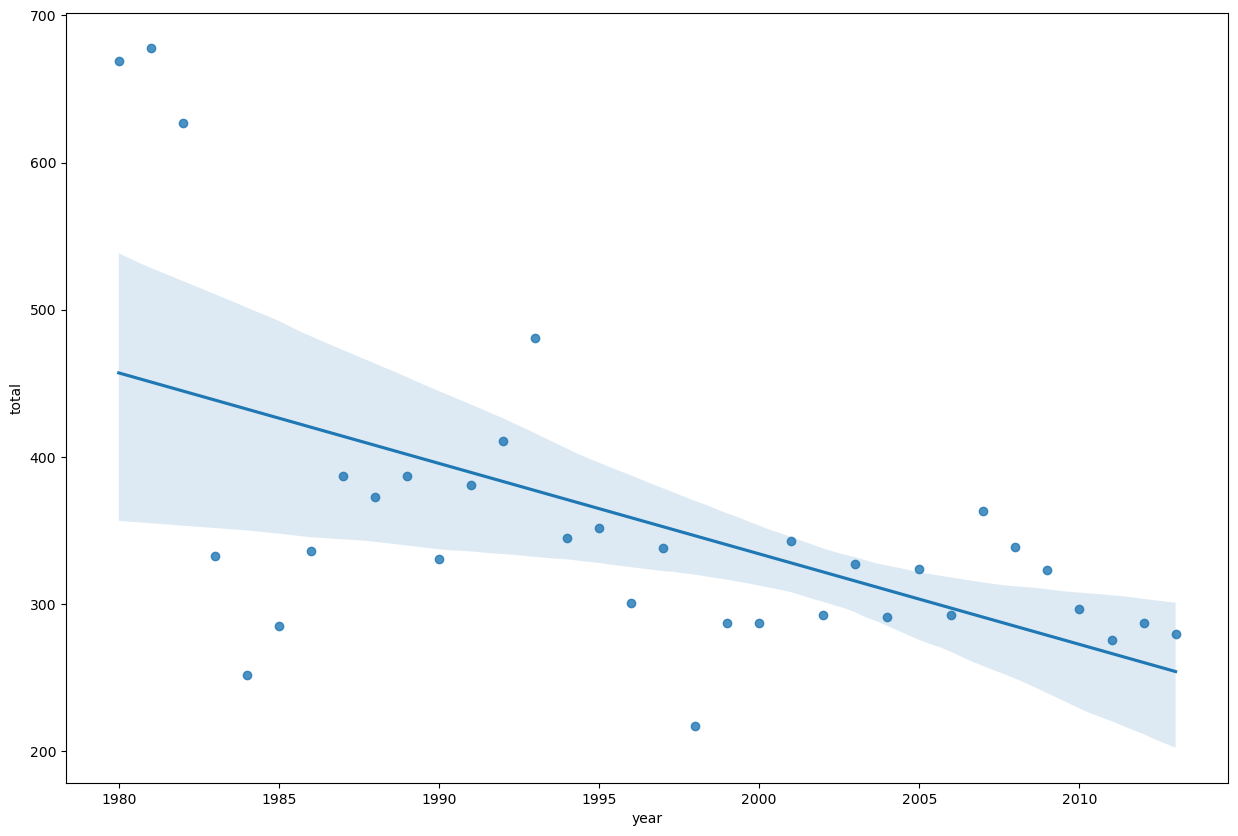

In [63]:
df_tot.columns=['year','total']
df_tot['year']=df_tot['year'].astype(int)
plt.figure(figsize=(15,10))
sns.regplot(x='year',y='total',data=df_tot)


In [75]:
import folium 
world_map=folium.Map(zoom_start=2)
world_map

In [90]:
import folium
world_map1=folium.Map(zoom_start=2)
world_geo=r'world_countries.json'
world_map1.choropleth(
    geo_path=world_geo,
    data=df,
    columns=['Country','Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    legend_name='Immigration to Canada'
)
world_map1

AttributeError: 'Map' object has no attribute 'choropleth'